<h1 align='center'>Stock dynamics</h1>

<img style='width: 250%' src='http://www.nasirmirza.in/wp-content/uploads/2016/07/cropped-derivative-analysis.jpg'/>


A stock market is where buyers and sellers trade shares of a company, and is one of the most popular ways for individuals and companies to invest money. The size of the world stock market  is now estimated to be in the trillions. The largest stock market in the world is the New York Stock Exchange (NYSE), located in New York City. About 2,800 companies are listed on the NSYE. In this problem, we'll look at the monthly stock prices of five of these companies: IBM, General Electric (GE), Procter and Gamble, Coca Cola, and Boeing. The data used in this problem comes from Infochimps.


Call the data frames **"IBM"**, **"GE"**, **"ProcterGamble"**, **"CocaCola"**, and **"Boeing"**, respectively.

Each data frame has two variables, described as follows:

**Date**: the date of the stock price, always given as the first of the month.<br>
**StockPrice**: the average stock price of the company in the given month.

In this problem, we'll take a look at how the stock dynamics of these companies have changed over time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
ibm = pd.read_csv('data/IBMStock.csv')
ge  = pd.read_csv('data/GEStock.csv')
proctorGamble = pd.read_csv('data/ProcterGambleStock.csv')
coke = pd.read_csv('data/CocaColaStock.csv')
boeing = pd.read_csv('data/BoeingStock.csv')

<h1 align='center'>The Data</h1>

In [3]:
print(ibm.shape)
print(ge.shape)
print(proctorGamble.shape)
print(coke.shape)
print(boeing.shape)

(480, 2)
(480, 2)
(480, 2)
(480, 2)
(480, 2)


In [4]:
print(ibm.columns)
print(ge.columns)
print(proctorGamble.columns)
print(coke.columns)
print(boeing.columns)

Index(['Date', 'StockPrice'], dtype='object')
Index(['Date', 'StockPrice'], dtype='object')
Index(['Date', 'StockPrice'], dtype='object')
Index(['Date', 'StockPrice'], dtype='object')
Index(['Date', 'StockPrice'], dtype='object')


**Date**: the date of the stock price, always given as the first of the month.<br>
**StockPrice**: the average stock price of the company in the given month.

In [5]:
ibm.head()

,Date,StockPrice
0,1/1/70,360.319048
1,2/1/70,346.723684
2,3/1/70,327.345714
3,4/1/70,319.852727
4,5/1/70,270.375238


<h1 align='center'>The Questions<h1>

1 - What is the mean stock price of IBM over this time period? (1970 - 2009)

In [6]:
ibm.StockPrice.mean()

144.3750303076664

2 - What is the minimum stock price of General Electric (GE) over this time period?

In [7]:
ge.StockPrice.min()

9.2936363639999993

3 - What is the maximum stock price of Coca-Cola over this time period?

In [8]:
coke.StockPrice.max()

146.58428569999998

4 - What is the median stock price of Boeing over this time period?

In [9]:
boeing.StockPrice.median()

44.88339827

5 - What is the standard deviation of the stock price of Procter & Gamble over this time period?

In [10]:
proctorGamble.StockPrice.std()

18.19414030797156

6 - Let's plot the stock prices to see if we can visualize trends in stock prices during this time period. Using the plot function, plot the Date on the x-axis and the StockPrice on the y-axis, for Coca-Cola.

Around what year did Coca-Cola has its highest stock price in this time period?
Around what year did Coca-Cola has its lowest stock price in this time period?

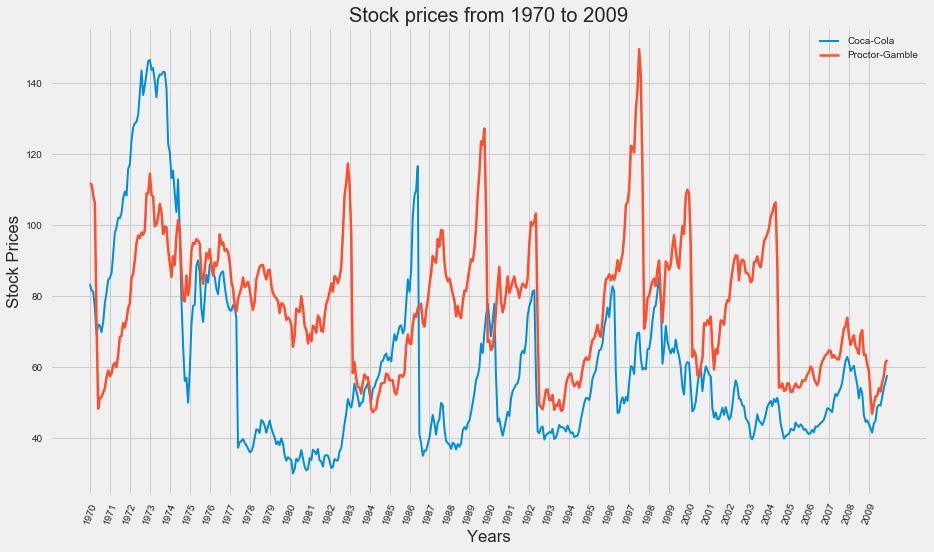

In [11]:
from datetime import datetime

xticks = [datetime.strptime(i, "%m/%d/%y") for i in ibm.Date[::12]]  # 12 to skip all the months in a year

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot_date(coke.Date, coke.StockPrice, fmt='-', linewidth=2, label='Coca-Cola')
ax.plot_date(proctorGamble.Date, proctorGamble.StockPrice, fmt='-', linewidth=2.5, label='Proctor-Gamble')
ax.set_xlabel('Years')
ax.set_ylabel('Stock Prices')
ax.set_title('Stock prices from 1970 to 2009')
ax.legend()
ax.set_xticks(xticks)
plt.xticks(rotation=70)
plt.show()

7 - Let's take a look at how the stock prices changed from 1995-2005 for all five companies

Which stock fell the most right after the technology bubble burst in March 2000?

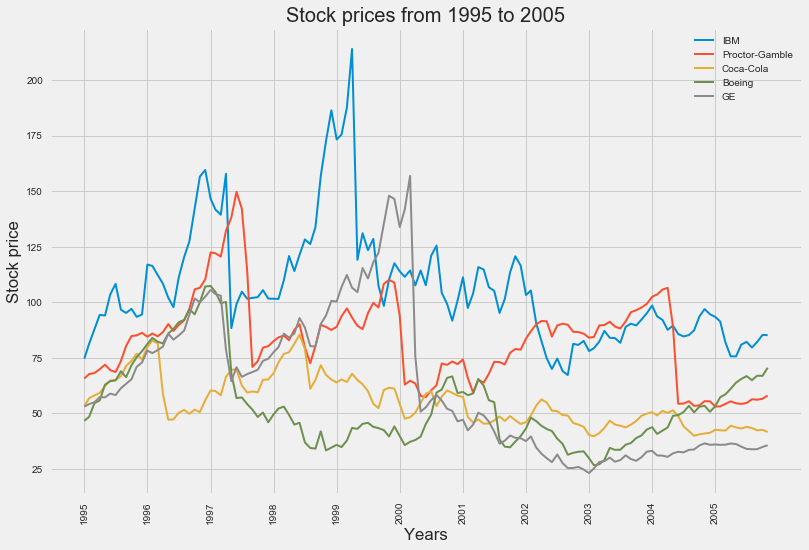

In [12]:
xticks = [datetime.strptime(i, "%m/%d/%y") for i in ibm.Date[301:432:12]]  # 12 to skip all the months in a year

plt.figure(figsize=(12, 8))

plt.plot_date(ibm.Date[301:432], ibm.StockPrice[301:432], fmt='-', linewidth=2, label='IBM')
plt.plot_date(ibm.Date[301:432], proctorGamble.StockPrice[301:432], fmt='-', linewidth=2, label='Proctor-Gamble')
plt.plot_date(ibm.Date[301:432], coke.StockPrice[301:432], fmt='-', linewidth=2, label='Coca-Cola')
plt.plot_date(ibm.Date[301:432], boeing.StockPrice[301:432], fmt='-', linewidth=2, label='Boeing')
plt.plot_date(ibm.Date[301:432], ge.StockPrice[301:432], fmt='-', linewidth=2, label='GE')

plt.title('Stock prices from 1995 to 2005')
plt.xlabel('Years')
plt.ylabel('Stock price')
plt.legend()
plt.xticks(xticks, rotation=90)
plt.show()

8 - Lastly, let's see if stocks tend to be higher or lower during certain months. Calculate the mean stock price of IBM, sorted by months

For IBM, compare the monthly averages to the overall average stock price. In which months has IBM historically had a higher stock price (on average)? Select all that apply.

In [13]:
xticks = [datetime.strptime(i, "%m/%d/%y") for i in ibm.Date]  # 12 to skip all the months in a year

In [14]:
ibm.Date = xticks
byMonth = pd.Series(sorted(ibm.Date, key=lambda x: x.month))

stock_prices = []
for i in byMonth:
    stock_prices.append(ibm.StockPrice[ibm.Date == i].values[0])

In [15]:
# The stock prices are ordered by the months. So on every 12th entry in stock_prices we got the same month 
months_chunks = list(zip(*[iter(stock_prices)]*40))

# The mean of each chunk is the mean of the stock prices on the same month of every year
means = [np.mean(i) for i in months_chunks]

In [1]:
plt.scatter(range(1, 13), means, marker='o', s=50)
plt.axhline(ibm.StockPrice.mean(), label='Mean of all stock prices')
plt.xticks(range(1, 13))
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Mean stock prices')
plt.title('Mean of the stock prices by months')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

9 - Repeat for each of the other four companies, and use the output to answer the remaining questions.

General Electric and Coca-Cola both have their highest average stock price in the same month. Which month is this? (April)

In [17]:
def mean_stock_prices(company, ):
    copyDate = company.Date.copy()
    xticks = [datetime.strptime(i, "%m/%d/%y") for i in copyDate]  # 12 to skip all the months in a year
    company.Date =xticks
    byMonth = pd.Series(sorted(company.Date, key=lambda x: x.month))

    stock_prices = []
    for i in byMonth:
        stock_prices.append(company.StockPrice[company.Date == i].values[0])
    # The stock prices are ordered by the months. So on every 12th entry in stock_prices we got the same month 
    months_chunks = list(zip(*[iter(stock_prices)]*40))
    # The mean of each chunk is the mean of the stock prices on the same month of every year
    means = [np.mean(i) for i in months_chunks]
    
    return means

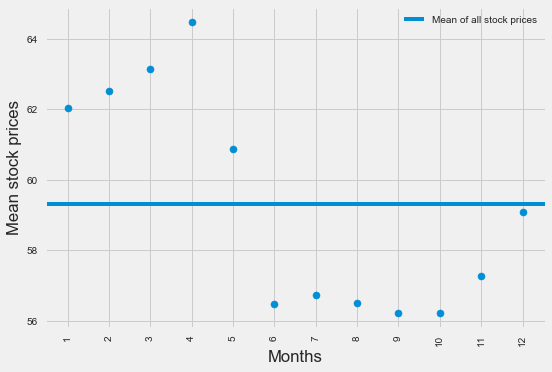

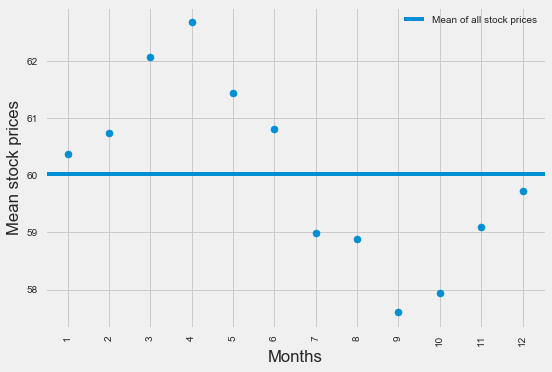

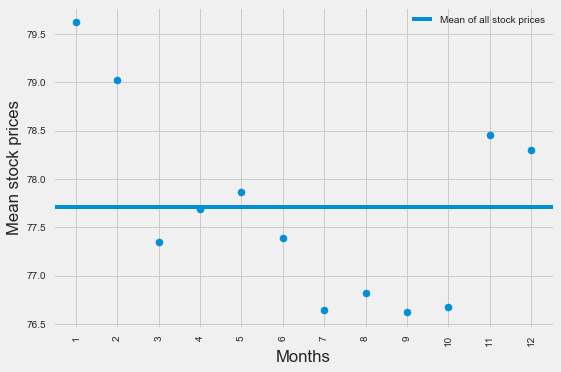

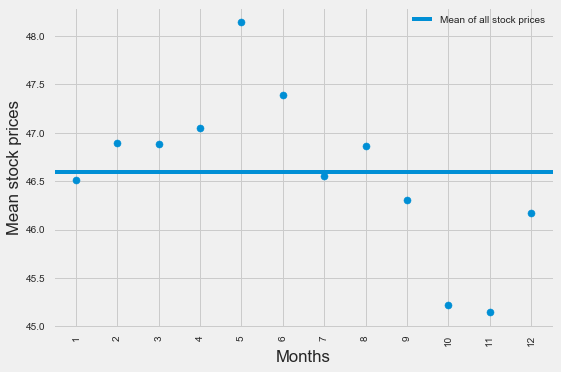

In [18]:
def plot_means(company):
    
    means = mean_stock_prices(company)
    
    plt.scatter(range(1, 13), means, marker='o', s=50)
    plt.axhline(company.StockPrice.mean(), label='Mean of all stock prices')
    plt.xticks(range(1, 13))
    plt.xticks(rotation=90)
    plt.xlabel('Months')
    plt.ylabel('Mean stock prices')
#     plt.title('Mean of the stock prices by months for ')
    plt.legend()
    plt.show()
    

for index, company in enumerate([ge, coke, proctorGamble, boeing]):
#     fig = plt.figure()
    plot_means(company)
